<a href="https://colab.research.google.com/github/tistZ25/Machine_Learning_Projects/blob/main/Handwritten_Digit_Recognition_Using_MNIST_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import keras

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

## Get the data and pre-process it

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
def plot_input_img(i):
  plt.imshow(X_train[0], cmap= 'binary')
  plt.title(y_train[i])
  plt.axis('off')
  plt.show()

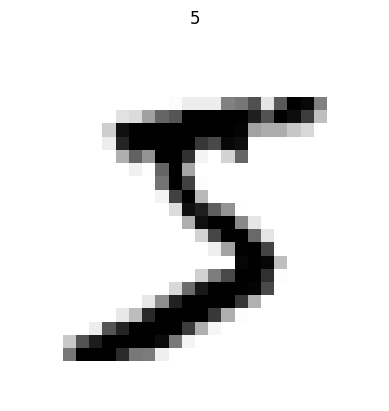

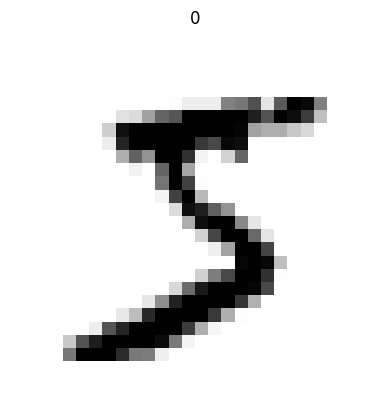

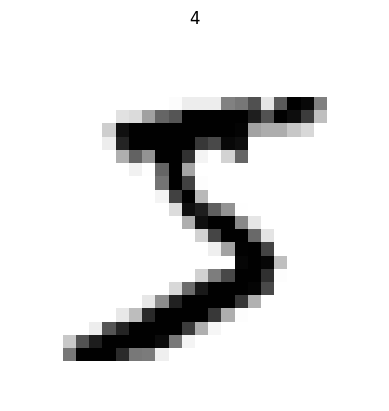

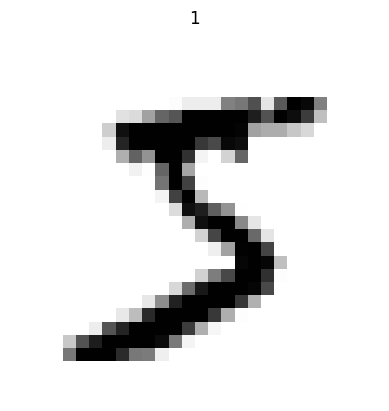

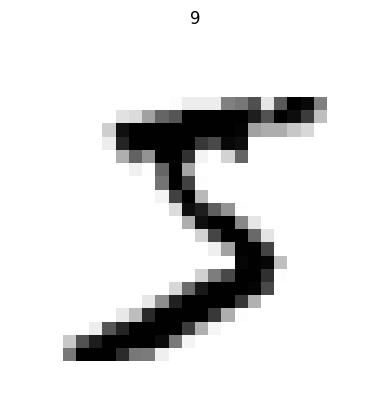

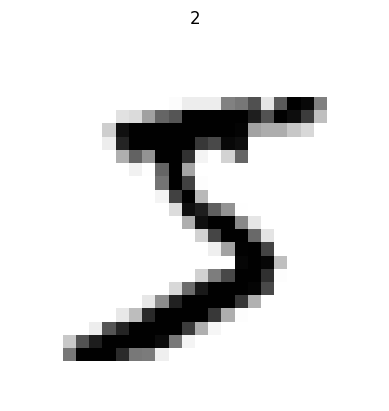

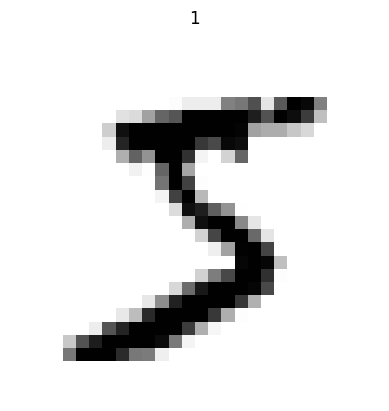

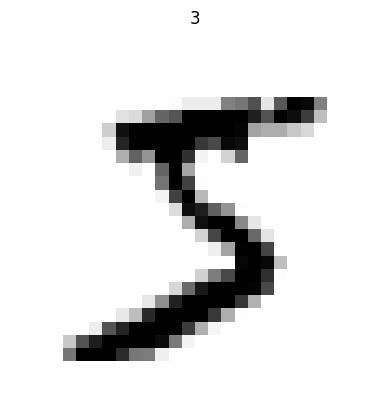

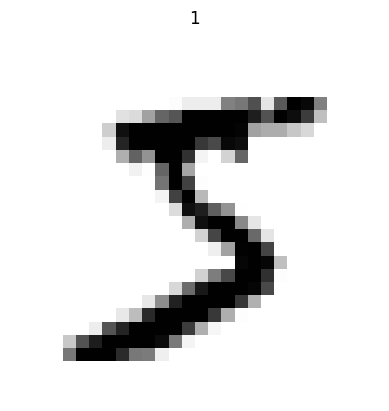

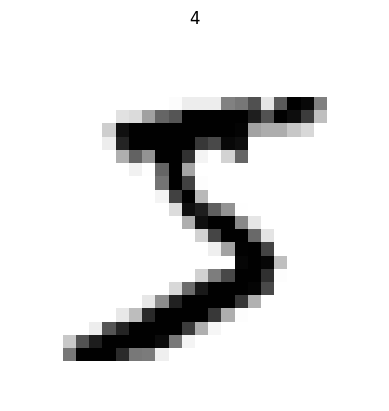

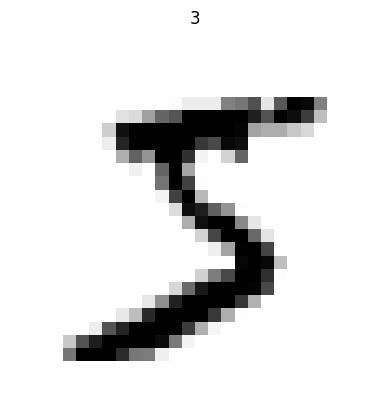

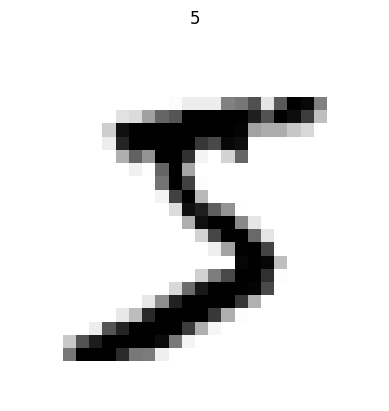

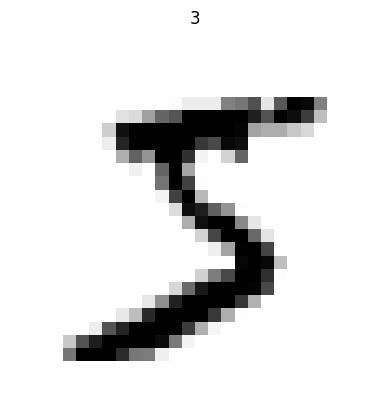

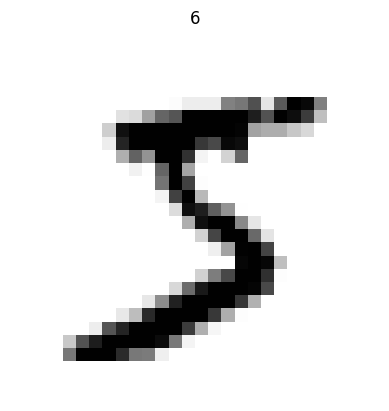

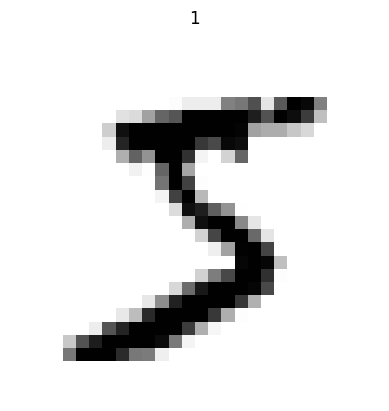

In [ ]:
for i in range(15):
  plot_input_img(i)

## Pre-Process the Images


In [ ]:
# Normalizing the image to [0,1] range
X_train = X_train.astype(np.float32)/255
X_test = X_test.astype(np.float32)/255

#Reshape/Expand the dimensions of images to (28, 28, 1)
X_train = np.expand_dims(X_train,-1)
X_test = np.expand_dims(X_test,-1)

In [ ]:
X_train.shape

(60000, 28, 28, 1)

## Convert classes to one hot vectors

In [ ]:
y_train = keras.utils.to_categorical(y_train)

In [ ]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [ ]:
y_test = keras.utils.to_categorical(y_test)

In [ ]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape = (28, 28, 1), activation = 'relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPool2D((2,2)))

model.add(Flatten())

model.add(Dropout(0.5))

model.add(Dense(10, activation = "softmax"))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)             

In [ ]:
model.compile(optimizer = 'adam', loss = keras.losses.categorical_crossentropy, metrics = ['accuracy'])

In [ ]:
# Callbacks
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Earlystopping
es = EarlyStopping(monitor='val_accuracy', patience=5, verbose=1, mode='max')

# Model Check Point
mc = ModelCheckpoint('bestmodel.h5', monitor='val_accuracy', save_best_only=True, mode='max')

In [ ]:
his = model.fit(X_train, y_train, epochs = 5, validation_split = 0.3, callbacks = [es, mc])

Epoch 1/5
1313/1313 [==============================] - 54s 41ms/step - loss: 0.0221 - accuracy: 0.9925 - val_loss: 0.0325 - val_accuracy: 0.9912
Epoch 2/5
1313/1313 [==============================] - 41s 31ms/step - loss: 0.0221 - accuracy: 0.9927 - val_loss: 0.0354 - val_accuracy: 0.9904
Epoch 3/5
1313/1313 [==============================] - 41s 31ms/step - loss: 0.0222 - accuracy: 0.9926 - val_loss: 0.0355 - val_accuracy: 0.9909
Epoch 4/5
1313/1313 [==============================] - 41s 31ms/step - loss: 0.0186 - accuracy: 0.9937 - val_loss: 0.0334 - val_accuracy: 0.9912
Epoch 5/5
1313/1313 [==============================] - 39s 30ms/step - loss: 0.0221 - accuracy: 0.9927 - val_loss: 0.0326 - val_accuracy: 0.9913


In [ ]:
# Save the model
model.save('bestmodel.h5')

In [ ]:
from keras.models import load_model

# Load the model
model_s = load_model('bestmodel.h5')

In [ ]:
score = model_s.evaluate(X_test, y_test)
print(f" the model accuracy is {score[1]} ")

313/313 [==============================] - 4s 12ms/step - loss: 0.0258 - accuracy: 0.9928
 the model accuracy is 0.9927999973297119 


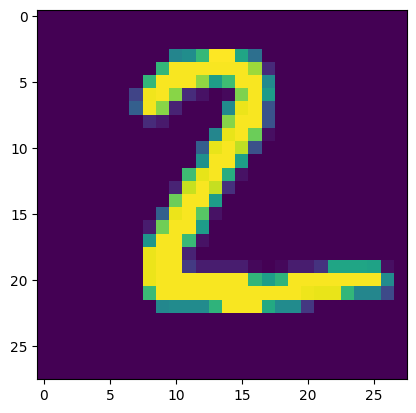

In [ ]:
plt.imshow(X_test[1])

In [ ]:
model.predict(X_test[1].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 296ms/step


array([2])

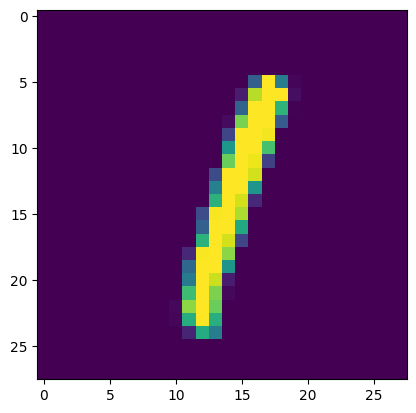

In [ ]:
plt.imshow(X_test[5])

In [ ]:
model.predict(X_test[5].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 79ms/step


array([1])

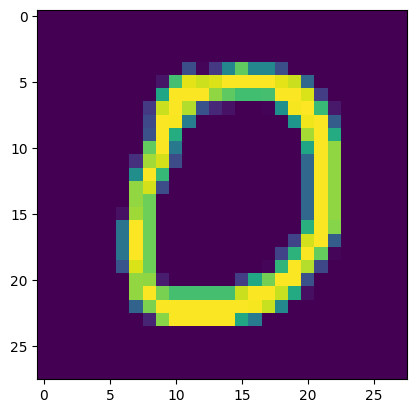

In [ ]:
plt.imshow(X_test[10])

In [ ]:
model.predict(X_test[10].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 22ms/step


array([0])